In [793]:
# import libraries
import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns            # For statistical data visualization
import math

# Part A
x_VCA = (Bl/k) I_coil


In [794]:
part1A = pd.read_excel('Lab4_A_8.4lbin.xlsx', skiprows = 1)

# Assuming df is your DataFrame
half_index = len(part1A) // 2
print(half_index)
# part1A_first_half = part1A.iloc[2000:5542]
part1A_first_half = part1A.iloc[7000:]
part1A_second_half = part1A.iloc[half_index:]

5509


In [795]:
part1A_first_half.describe()

,Time (s),Load Cell (kg),LVIT (V),Coil Voltage (V),Coil Current (A)
count,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000
mean,45.050000,0.473122,6.230034,2.918834,0.880187
std,5.801648,0.205889,0.223580,1.901475,0.259449
min,35.005000,0.186294,5.914521,0.304321,0.519695
25%,40.027500,0.292156,6.034169,1.260348,0.652022
50%,45.050000,0.477579,6.238622,2.974688,0.888732
75%,50.072500,0.621248,6.394098,4.292120,1.067908
max,55.095000,0.854670,6.641283,6.561142,1.379411


C:\Users\kylea\AppData\Local\Temp\ipykernel_16192\2870590431.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part1A_first_half['Displacement (mm)'] = displacementpart1A


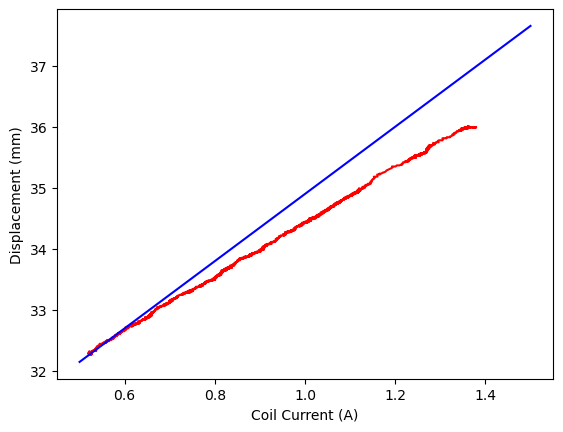

In [796]:
displacementpart1A = []

# V(x) = -0.35 + 0.19x
for i in range(7000, 11019):
    displacementpart1A.append((part1A_first_half['LVIT (V)'][i] + 0.345)/0.194)

# Given parameters
B_l = 8.98  # N/Amp
k = 1.629  # N/mm

# Current values (in Amps)
current = np.linspace(0.5, 1.5, 100)

# Displacement calculation (in mm)
displacement = ((B_l / k) * current) + 29.39

part1A_first_half['Displacement (mm)'] = displacementpart1A

plt.plot(part1A_first_half['Coil Current (A)'], part1A_first_half['Displacement (mm)'], color = 'r')
plt.plot(current, displacement, label=r'$y = \frac{10.2}{1.4711} \cdot x$', color='b')
plt.xlabel('Coil Current (A)')
plt.ylabel('Displacement (mm)')
plt.show()

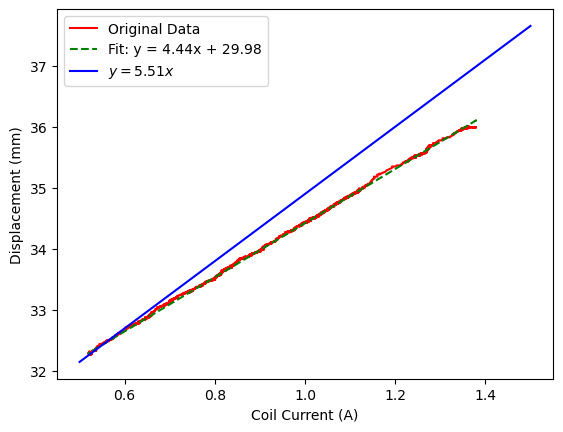

In [797]:
# Assuming part1A_first_half['Coil Current (A)'] and part1A_first_half['Displacement (mm)'] are your x and y data
x = part1A_first_half['Coil Current (A)']
y = part1A_first_half['Displacement (mm)']

# Fit a straight line
coefficients = np.polyfit(x, y, 1)  # degree 1 for a linear fit
slope, intercept = coefficients

# Generate the fitted line
y_fit = slope * x + intercept

# Plot the original data
plt.plot(x, y, color='r', label='Original Data')

# Plot the fitted line
plt.plot(x, y_fit, color='g', linestyle='--', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')

# Additional plot
plt.plot(current, displacement, label=r'$y = 5.51 x$', color='b')

# Labels and legend
plt.xlabel('Coil Current (A)')
plt.ylabel('Displacement (mm)')
plt.legend()
plt.show()


5.5125844076120325
RMSE between fitted and theoretical line: 0.98
MAE between fitted and theoretical line: 0.94


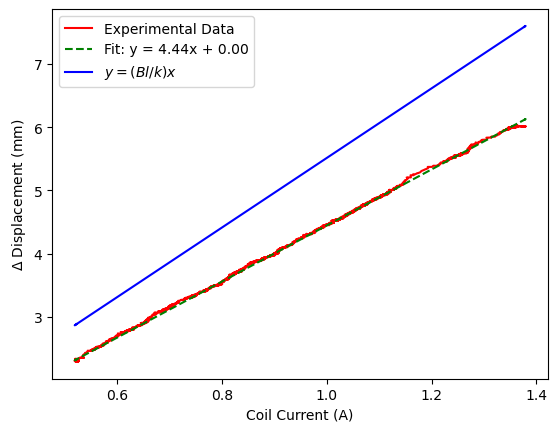

In [798]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming part1A_first_half['Coil Current (A)'] and part1A_first_half['Displacement (mm)'] are your x and y data
x = part1A_first_half['Coil Current (A)']
y_exp = part1A_first_half['Displacement (mm)'] - 29.98

# Fit a straight line to the experimental data
coefficients = np.polyfit(x, y_exp, 1)  # degree 1 for a linear fit
slope, intercept = coefficients
y_fit = slope * x + intercept

B_l = 8.98
constant = B_l/k
print(constant)

# Generate theoretical line values using the theoretical equation
y_theo = constant * x # Theoretical line, replace with actual equation if different

# Calculate RMSE and MAE between the fitted and theoretical lines
rmse = np.sqrt(mean_squared_error(y_fit, y_theo))
mae = mean_absolute_error(y_fit, y_theo)

# Print comparison metrics
print(f"RMSE between fitted and theoretical line: {rmse:.2f}")
print(f"MAE between fitted and theoretical line: {mae:.2f}")

# Plot the experimental data, fitted line, and theoretical line
plt.plot(x, y_exp, color='r', label='Experimental Data')
plt.plot(x, y_fit, color='g', linestyle='--', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')
plt.plot(x, y_theo, label=r'$y = (Bl/k) x$', color='b')  # Theoretical line

# Labels and legend
plt.xlabel('Coil Current (A)')
plt.ylabel(r'$\Delta$ Displacement (mm)')
plt.legend()
plt.show()


RMSE (Root Mean Square Error) of 0.91 suggests that the average deviation from the theoretical line is close to 1 mm. This is a relatively low error, particularly if the application requires high accuracy.

MAE (Mean Absolute Error) of 0.78 indicates that, on average, the predicted values are less than 1 mm away from the experimental values.

The experimental data has an offset in it of about 29.39 mm with a linear relationship. The linear relationship is a characteristic of both the theoretical and the experimental trend of the data. However, the theoretical data indicates that the data should start at (0,0) but experimental fit is not. 

# Part B


In [799]:
part1hz = pd.read_excel('Lab4_1hz.xlsx', skiprows = 1)
part5hz = pd.read_excel('Lab4_5hz.xlsx', skiprows = 1)
part9hz = pd.read_excel('Lab4_9hz.xlsx', skiprows = 1)
part10hz = pd.read_excel('Lab4_10hz.xlsx', skiprows = 1)
part11hz = pd.read_excel('Lab4_11hz.xlsx', skiprows = 1)
part12hz = pd.read_excel('lab4_12hz.xlsx', skiprows = 1)
part14hz = pd.read_excel('Lab4_14hz.xlsx', skiprows = 1)
part15hz = pd.read_excel('Lab4_15hz.xlsx', skiprows = 1)
part16hz = pd.read_excel('Lab4_16hz.xlsx', skiprows = 1)
part20hz = pd.read_excel('Lab4_20hz.xlsx', skiprows = 1)

In [800]:
part1hz.head()

,Time (s),Load Cell (kg),Accelerometer (V),LED (V),Coil Voltage (V),Coil Current (A)
0,0.005,0.170298,2.457382,6.326885,0.332505,0.211644
1,0.010,0.169969,2.455901,6.329187,0.338427,0.212631
2,0.015,0.168653,2.455737,6.329516,0.339413,0.211644
3,0.020,0.169969,2.453928,6.329516,0.337440,0.212960
4,0.025,0.169804,2.455901,6.326227,0.333492,0.213289


In [801]:
part1hzcut = part1hz[1450:]
part5hzcut = part5hz[230:]
part9hzcut = part9hz[230:]
part10hzcut = part10hz[230:]
part11hzcut = part11hz[230:]
part12hzcut = part12hz[230:]
part14hzcut = part14hz[230:]
part15hzcut = part15hz[230:]
part16hzcut = part16hz[230:]
part20hzcut = part20hz[400:]

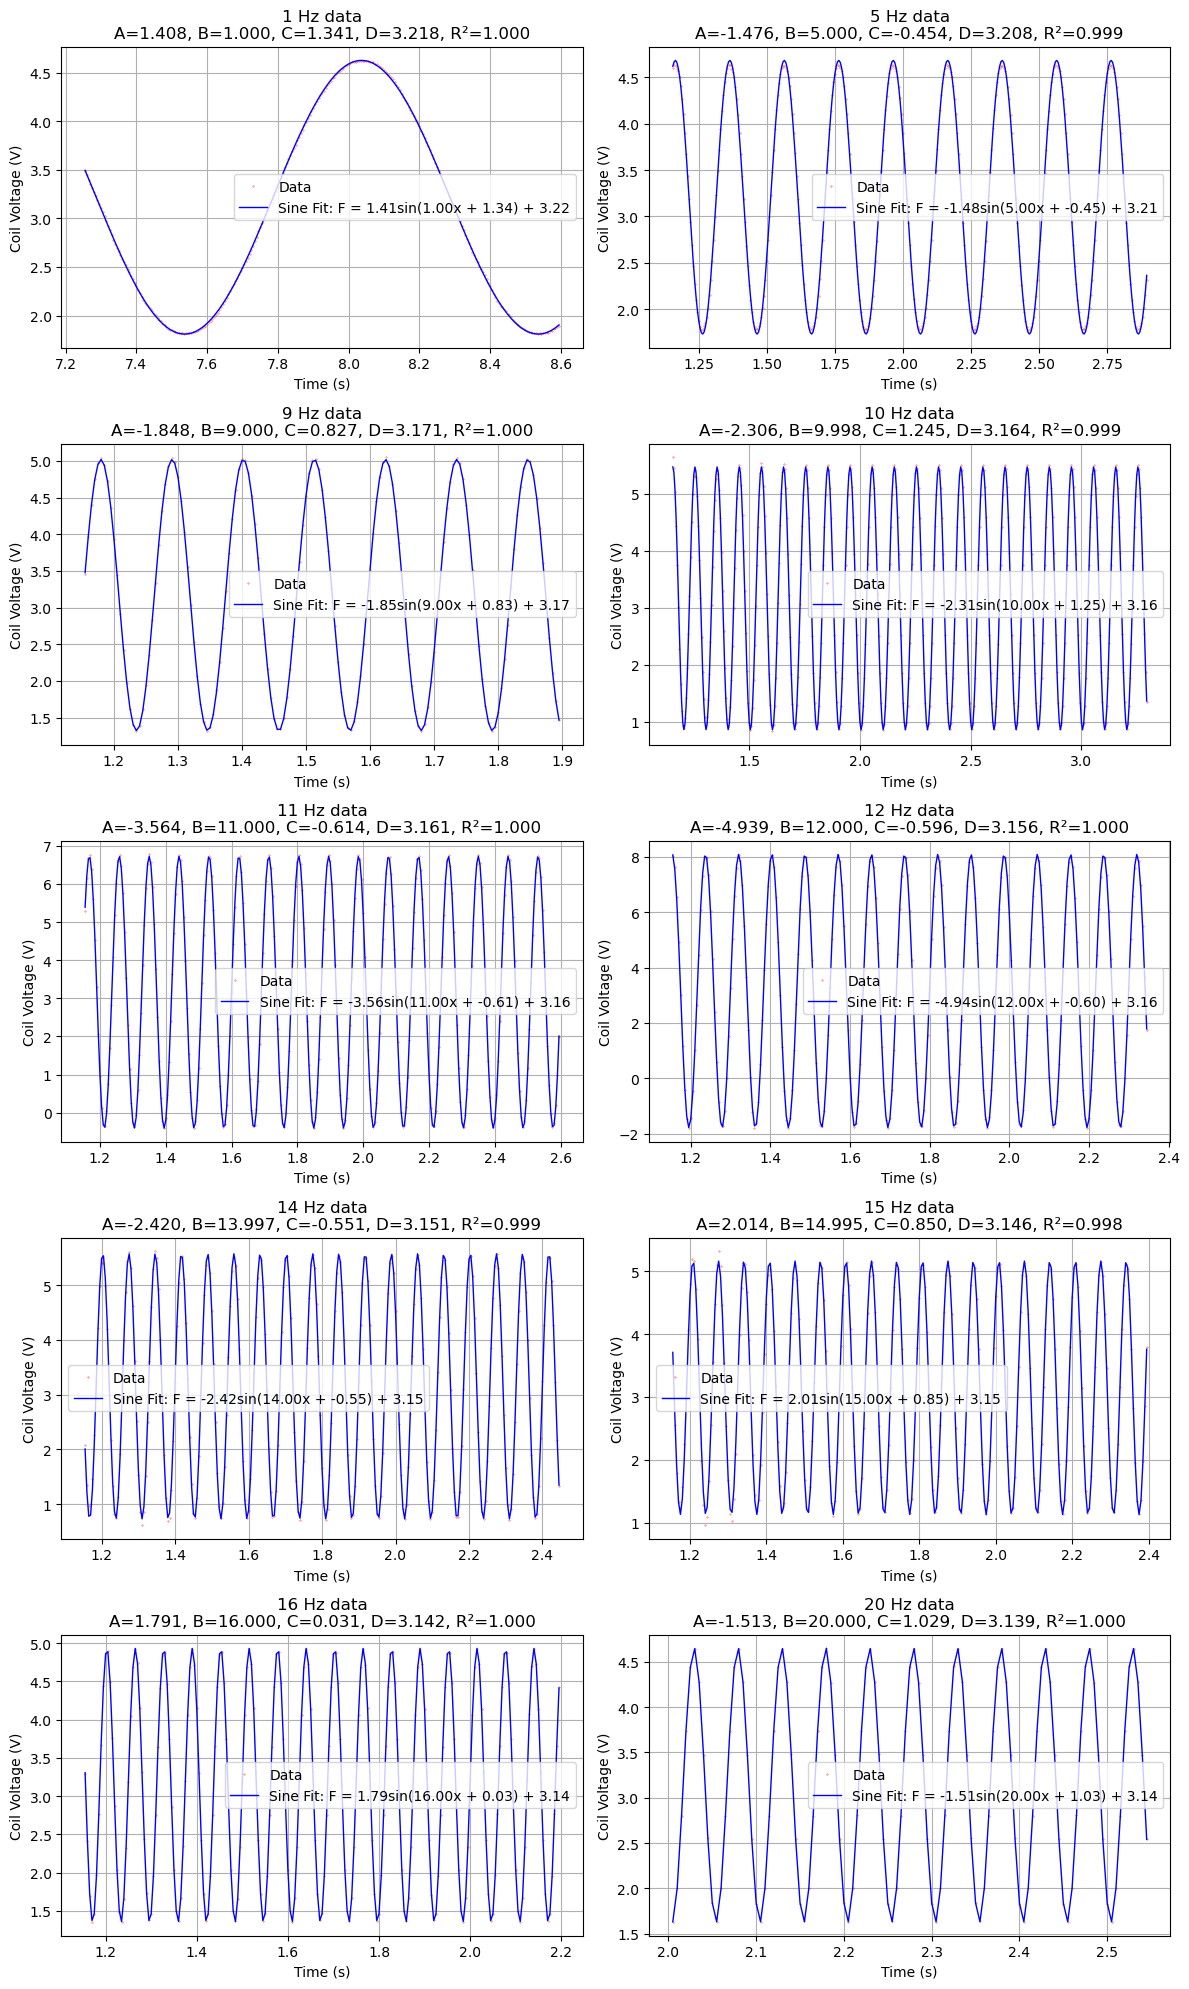

In [802]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the sine model function
def sine_function(x, A, B, C, D):
    return A * np.sin((2 * np.pi * B * x) + C) + D

# Define a function to calculate R^2
def r_squared(y, y_fit):
    ss_res = np.sum((y - y_fit) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    return 1 - (ss_res / ss_tot)

# Define spring data and titles with elbow points for pre-tensioned springs
Frequency_data = [
    (part1hzcut, '1 Hz data', (0, 0), 1),
    (part5hzcut, '5 Hz data', (0, 1), 5), 
    (part9hzcut, '9 Hz data', (1, 0), 9),  
    (part10hzcut, '10 Hz data', (1, 1), 10),
    (part11hzcut, '11 Hz data', (2, 0), 11),
    (part12hzcut, '12 Hz data', (2, 1), 12), 
    (part14hzcut, '14 Hz data', (3, 0), 14),  
    (part15hzcut, '15 Hz data', (3, 1), 15),
    (part16hzcut, '16 Hz data', (4, 0), 16),
    (part20hzcut, '20 Hz data', (4, 1), 20)
]

# Array 
frequency_array = [1,5,9,10,11,12,14,15,16,20]
amplitude_array = []
phasevoltage_array = []

# Create figure with subplots
fig, axs = plt.subplots(5, 2, figsize=(12, 20))

# Process each spring
for data, title, (i, j), freq in Frequency_data:

    # Filter data based on starting point
    x_data = data['Time (s)']
    y_data = data['Coil Voltage (V)']
    
    # Fit a sine function to the data
    p0 = [np.max(y_data), freq, 0, np.mean(y_data)]  # Initial guess

    try:
        popt, pcov = curve_fit(sine_function, x_data, y_data, p0=p0)
        A, B, C, D = popt
        y_fit = sine_function(x_data, A, B, C, D)
        equation = f'F = {A:.2f}sin({B:.2f}x + {C:.2f}) + {D:.2f}'
        amplitude_array.append(abs(A))
        phasevoltage_array.append(math.degrees(C))
        # Calculate R^2
        r2 = r_squared(y_data, y_fit)

    except RuntimeError:
        # In case the fit fails, default values for plot
        A, B, C, D = 0, 0, 0, np.mean(y_data)
        y_fit = np.full_like(x_data, np.mean(y_data))
        equation = 'Fit failed'
        r2 = 0

    # Plot all data points
    axs[i, j].plot(data['Time (s)'], data['Coil Voltage (V)'], '.', 
                   color='r', markersize=0.5, label='Data')
    
    # Plot sine fit for the filtered portion
    axs[i, j].plot(x_data, y_fit, '-', 
                   color='b', linewidth=1, label=f'Sine Fit: {equation}')
    
    # Add title and labels with fit parameters
    axs[i, j].set_title(f'{title}\nA={A:.3f}, B={B:.3f}, C={C:.3f}, D={D:.3f}, R²={r2:.3f}')
    axs[i, j].set_xlabel('Time (s)')
    axs[i, j].set_ylabel('Coil Voltage (V)')
    axs[i, j].grid(True)
    axs[i, j].legend()

plt.tight_layout()
plt.show()

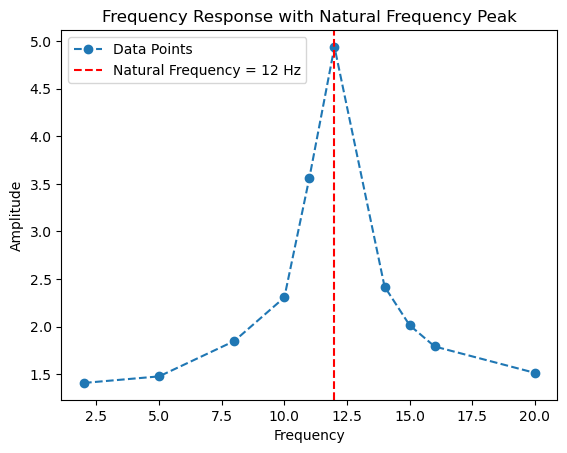

In [803]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Sample data (replace these with your actual frequency and amplitude arrays)
frequency_array = np.array([2, 5, 8, 10, 11, 12, 14, 15, 16, 20])
amplitude_array = np.array(amplitude_array)
phasevoltage_array = np.array(phasevoltage_array)

# Plot the data points and the fitted resonance curve
plt.plot(frequency_array, amplitude_array, 'o', label='Data Points', linestyle = '--')
# plt.plot(frequency_smooth, amplitude_smooth, 'r-', label=f'Lorentzian Fit: f0={f0:.2f}')
plt.axvline(x=12, color='red', linestyle='--', label='Natural Frequency = 12 Hz')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Frequency Response with Natural Frequency Peak')
plt.legend()
plt.show()

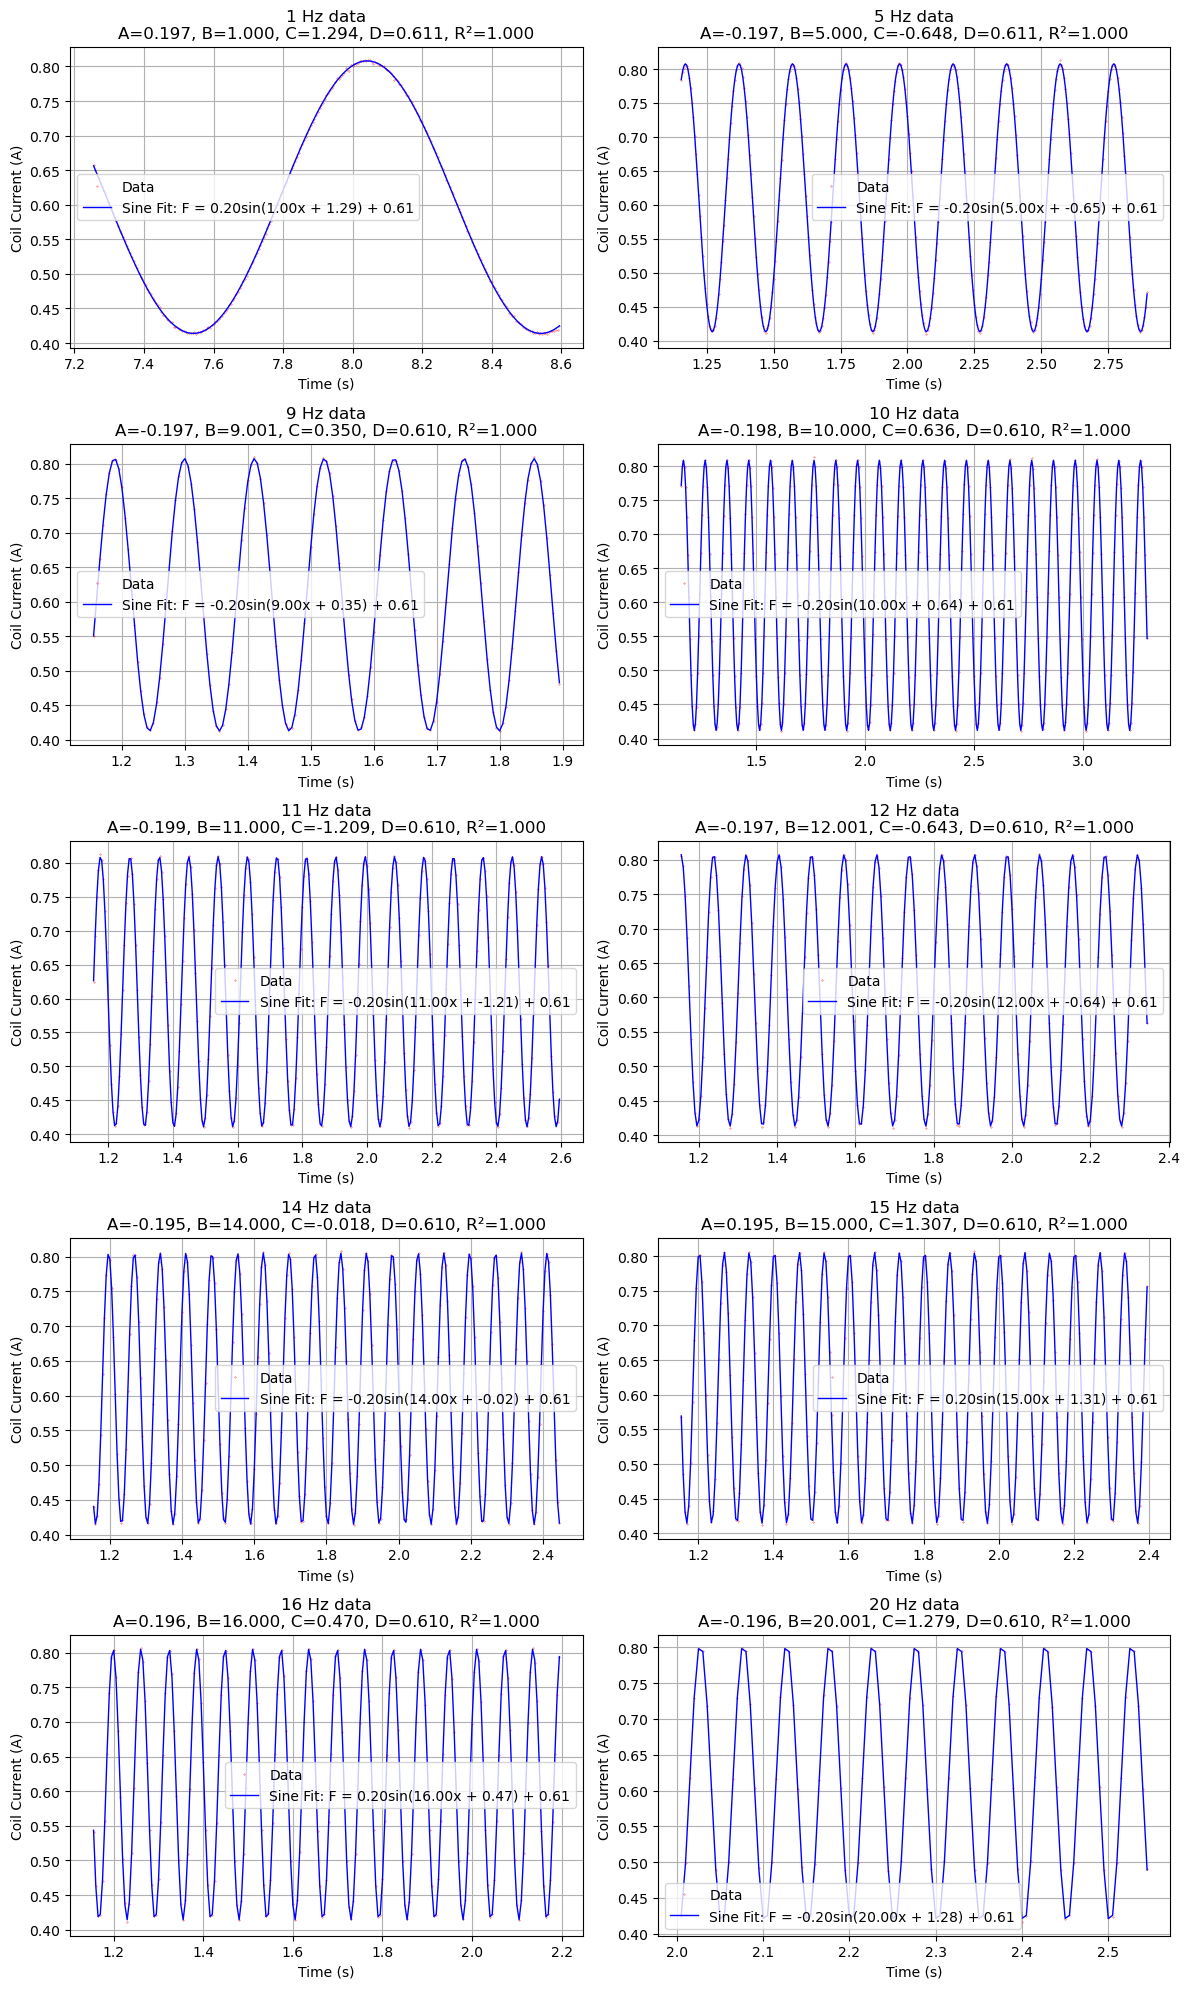

In [804]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the sine model function
def sine_function(x, A, B, C, D):
    return A * np.sin((2 * np.pi * B * x) + C) + D

# Define a function to calculate R^2
def r_squared(y, y_fit):
    ss_res = np.sum((y - y_fit) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    return 1 - (ss_res / ss_tot)

# Define spring data and titles with elbow points for pre-tensioned springs
Frequency_data = [
    (part1hzcut, '1 Hz data', (0, 0), 1),
    (part5hzcut, '5 Hz data', (0, 1), 5), 
    (part9hzcut, '9 Hz data', (1, 0), 9),  
    (part10hzcut, '10 Hz data', (1, 1), 10),
    (part11hzcut, '11 Hz data', (2, 0), 11),
    (part12hzcut, '12 Hz data', (2, 1), 12), 
    (part14hzcut, '14 Hz data', (3, 0), 14),  
    (part15hzcut, '15 Hz data', (3, 1), 15),
    (part16hzcut, '16 Hz data', (4, 0), 16),
    (part20hzcut, '20 Hz data', (4, 1), 20)
]

# Array 
frequency_array = [1,5,9,10,11,12,14,15,16,20]
amplitudecurrent_array = []
phasecurrent_array = []

# Create figure with subplots
fig, axs = plt.subplots(5, 2, figsize=(12, 20))

# Process each spring
for data, title, (i, j), freq in Frequency_data:

    # Filter data based on starting point
    x_data = data['Time (s)']
    y_data = data['Coil Current (A)']
    
    # Fit a sine function to the data
    p0 = [np.max(y_data), freq, 0, np.mean(y_data)]  # Initial guess

    try:
        popt, pcov = curve_fit(sine_function, x_data, y_data, p0=p0)
        A, B, C, D = popt
        y_fit = sine_function(x_data, A, B, C, D)
        equation = f'F = {A:.2f}sin({B:.2f}x + {C:.2f}) + {D:.2f}'
        amplitudecurrent_array.append(abs(A))
        phasecurrent_array.append(math.degrees(C))
        # Calculate R^2
        r2 = r_squared(y_data, y_fit)

    except RuntimeError:
        # In case the fit fails, default values for plot
        A, B, C, D = 0, 0, 0, np.mean(y_data)
        y_fit = np.full_like(x_data, np.mean(y_data))
        equation = 'Fit failed'
        r2 = 0

    # Plot all data points
    axs[i, j].plot(data['Time (s)'], data['Coil Current (A)'], '.', 
                   color='r', markersize=0.5, label='Data')
    
    # Plot sine fit for the filtered portion
    axs[i, j].plot(x_data, y_fit, '-', 
                   color='b', linewidth=1, label=f'Sine Fit: {equation}')
    
    # Add title and labels with fit parameters
    axs[i, j].set_title(f'{title}\nA={A:.3f}, B={B:.3f}, C={C:.3f}, D={D:.3f}, R²={r2:.3f}')
    axs[i, j].set_xlabel('Time (s)')
    axs[i, j].set_ylabel('Coil Current (A)')
    axs[i, j].grid(True)
    axs[i, j].legend()

plt.tight_layout()
plt.show()

In [805]:
part1hzcut.head()

,Time (s),Load Cell (kg),Accelerometer (V),LED (V),Coil Voltage (V),Coil Current (A)
1450,7.255,0.528369,2.456559,3.928425,3.484606,0.657053
1451,7.260,0.522448,2.454915,3.960005,3.442170,0.650803
1452,7.265,0.517513,2.452447,3.992243,3.396774,0.644882
1453,7.270,0.512579,2.449980,4.025468,3.356312,0.638961
1454,7.275,0.507315,2.451954,4.058035,3.315849,0.631723


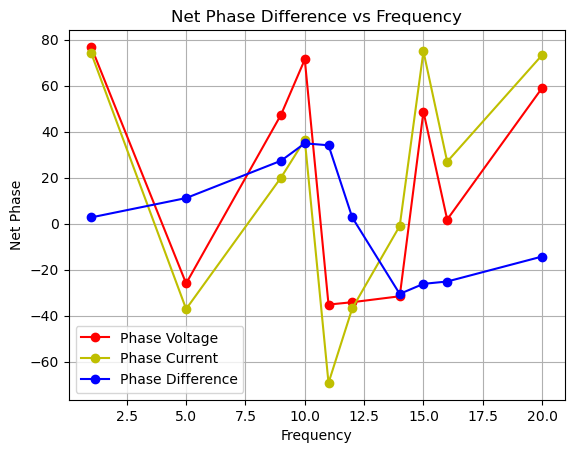

In [806]:
netphasearray = []

# Use zip to iterate over both arrays simultaneously
for currentphase, voltagephase in zip(phasecurrent_array, phasevoltage_array):
    netphasearray.append(voltagephase - currentphase)

# Plot the result
plt.plot(frequency_array, phasevoltage_array, 'o', linestyle = '-', label = 'Phase Voltage', color = 'r')
plt.plot(frequency_array, phasecurrent_array, 'o', linestyle = '-', label = 'Phase Current', color = 'y')
plt.plot(frequency_array, netphasearray, 'o', linestyle = '-', label = 'Phase Difference', color = 'b')
plt.xlabel('Frequency')
plt.ylabel('Net Phase')
plt.title('Net Phase Difference vs Frequency')
plt.legend()
plt.grid()
plt.show()


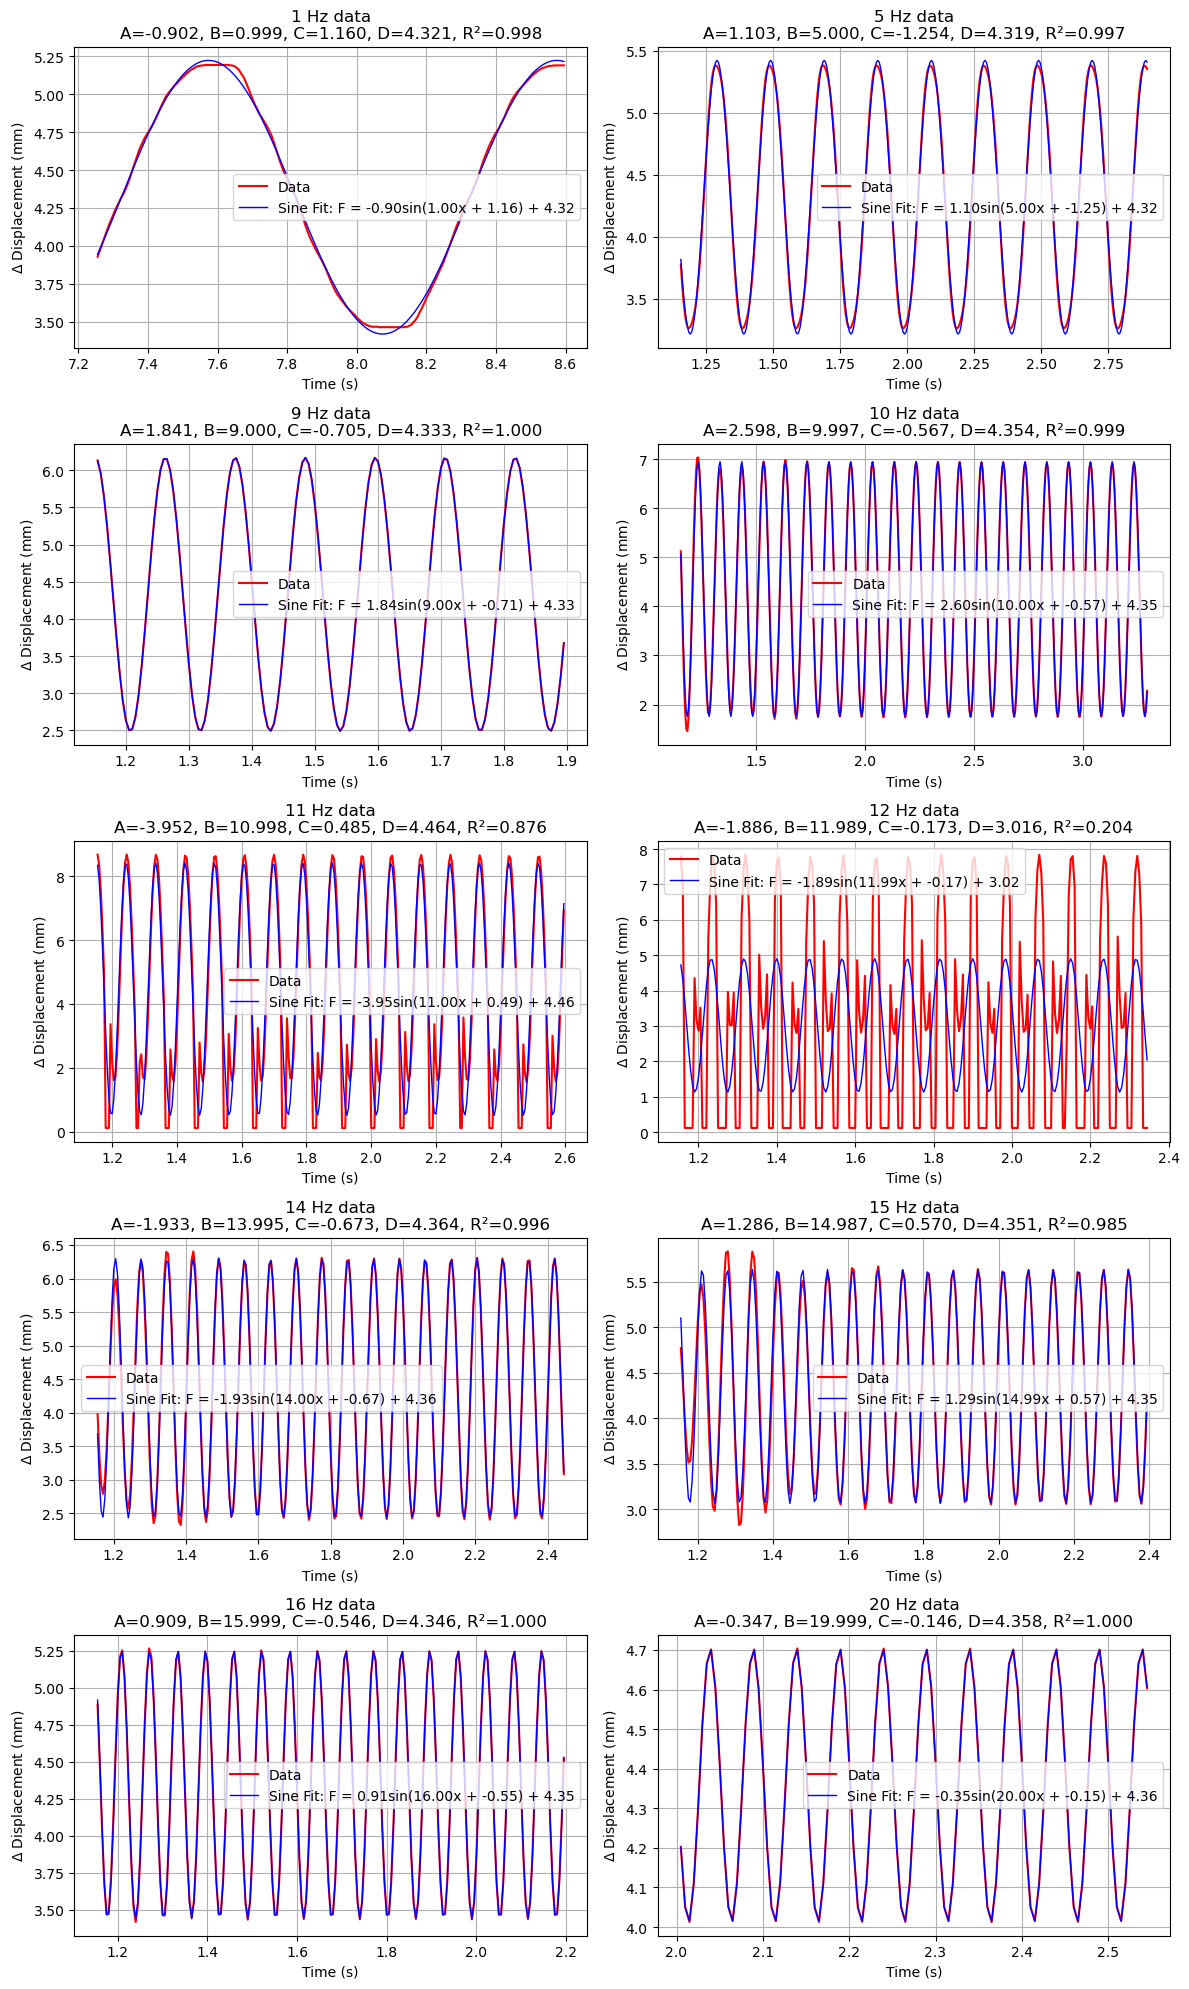

Maximum value in column B: 7.850313
Minimum value in column B: 0.114453638
Range: 7.735859362
Amplitude: 3.867929681


In [807]:
import matplotlib.pyplot as plt

# Define the sine model function
def sine_function(x, A, B, C, D):
    return A * np.sin((2 * np.pi * B * x) + C) + D

# Define a function to calculate R^2
def r_squared(y, y_fit):
    ss_res = np.sum((y - y_fit) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    return 1 - (ss_res / ss_tot)

# Define spring data and titles with elbow points for pre-tensioned springs
Frequency_data = [
    (part1hzcut, '1 Hz data', (0, 0), 1),
    (part5hzcut, '5 Hz data', (0, 1), 5), 
    (part9hzcut, '9 Hz data', (1, 0), 9),  
    (part10hzcut, '10 Hz data', (1, 1), 10),
    (part11hzcut, '11 Hz data', (2, 0), 11),
    (part12hzcut, '12 Hz data', (2, 1), 12), 
    (part14hzcut, '14 Hz data', (3, 0), 14),  
    (part15hzcut, '15 Hz data', (3, 1), 15),
    (part16hzcut, '16 Hz data', (4, 0), 16),
    (part20hzcut, '20 Hz data', (4, 1), 20)
]

amplitudedisplacement_array = []

# Create figure with subplots
fig, axs = plt.subplots(5, 2, figsize=(12, 20))

for data, title, (i, j), freq in Frequency_data:
    displacement = []

    # V(x) = -15.07 + x
    for item in data['LED (V)']:
        displacement.append(item)

    # Filter data based on starting point
    x_data = data['Time (s)']
    y_data = displacement
    
    # Fit a sine function to the data
    p0 = [np.max(y_data), freq, 0, 4.3]  # Initial guess

    try:
        popt, pcov = curve_fit(sine_function, x_data, y_data, p0=p0)
        A, B, C, D = popt
        y_fit = sine_function(x_data, A, B, C, D)
        equation = f'F = {A:.2f}sin({B:.2f}x + {C:.2f}) + {D:.2f}'
        amplitudedisplacement_array.append(abs(A))
        # Calculate R^2
        r2 = r_squared(y_data, y_fit)

    except RuntimeError:
        # In case the fit fails, default values for plot
        A, B, C, D = 0, 0, 0, np.mean(y_data)
        y_fit = np.full_like(x_data, np.mean(y_data))
        equation = 'Fit failed'
        r2 = 0

    # Plot all data points
    axs[i, j].plot(data['Time (s)'], displacement, color='r', markersize=0.5, label='Data')
    
    # Plot sine fit for the filtered portion
    axs[i, j].plot(x_data, y_fit, '-', color='b', linewidth=1, label=f'Sine Fit: {equation}')
    
    # Add title and labels with fit parameters
    axs[i, j].set_title(f'{title}\nA={A:.3f}, B={B:.3f}, C={C:.3f}, D={D:.3f}, R²={r2:.3f}')
    axs[i, j].set_xlabel('Time (s)')
    axs[i, j].set_ylabel(r'$\Delta$ Displacement (mm)')
    axs[i, j].grid(True)
    axs[i, j].legend()

plt.tight_layout()
plt.show()

max_value_B = part12hzcut['LED (V)'].max()
min_value_B = part12hzcut['LED (V)'].min()
amp = (max_value_B-min_value_B)/2

print("Maximum value in column B:", max_value_B)
print("Minimum value in column B:", min_value_B)
print("Range:",max_value_B-min_value_B)
print("Amplitude:",amp)


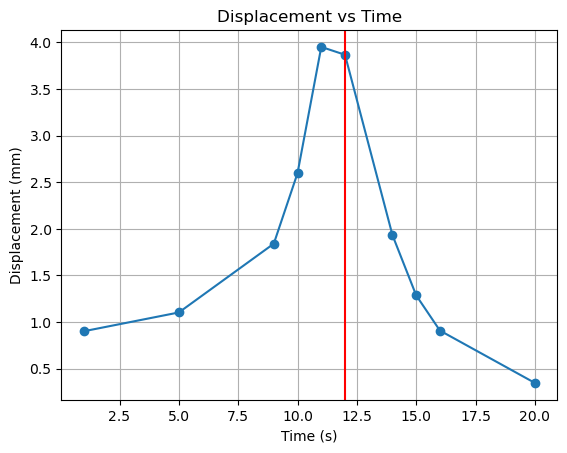

In [808]:
amplitudedisplacement_array[5] = 3.8679
plt.plot(frequency_array, amplitudedisplacement_array, '-', marker = 'o')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (mm)')
plt.title('Displacement vs Time')
plt.axvline(x = 12, color = 'r')
plt.grid(True)
plt.show()

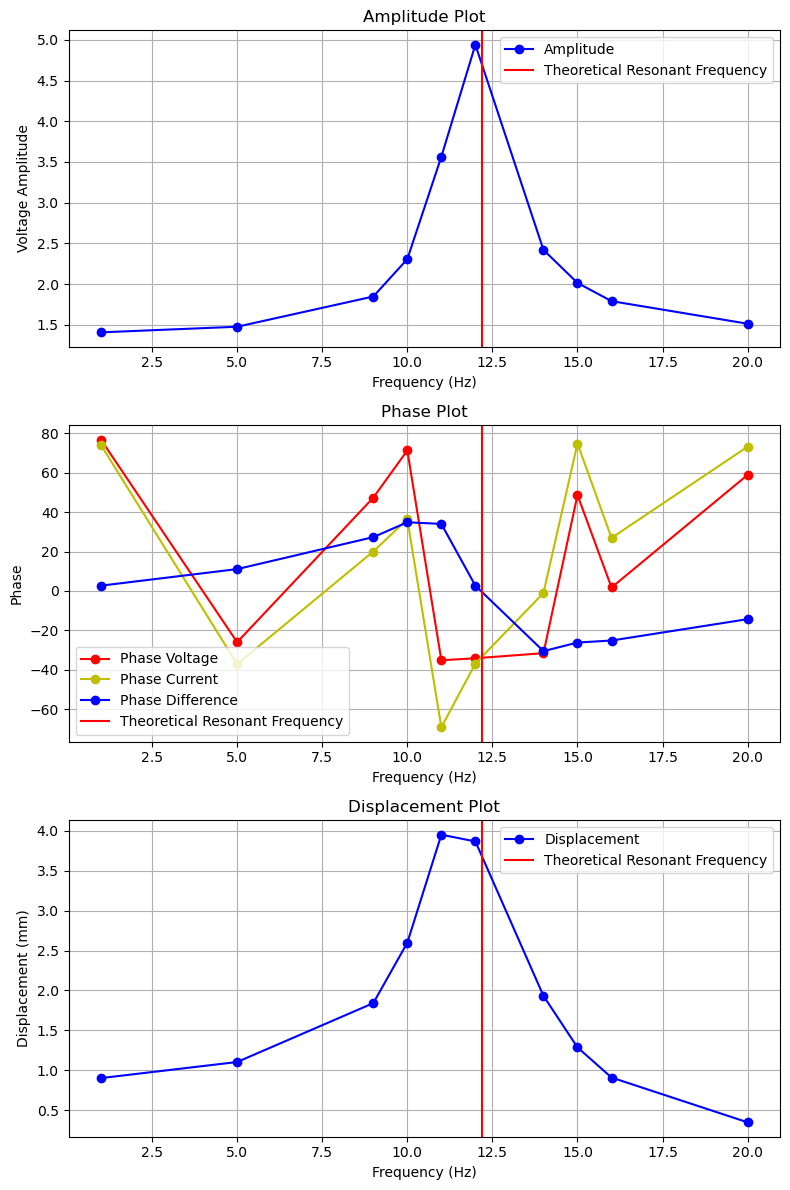

In [809]:
netphasearray = []

# Use zip to iterate over both arrays simultaneously
for currentphase, voltagephase in zip(phasecurrent_array, phasevoltage_array):
    netphasearray.append(voltagephase - currentphase)

fig, axs = plt.subplots(3, 1, figsize=(8, 12))  # 3 rows, 1 column

# Plot each graph in a different subplot
axs[0].plot(frequency_array, amplitude_array, color='b', marker ='o', label='Amplitude')
axs[0].axvline(x = 12.2, color = 'r', label ='Theoretical Resonant Frequency')
axs[0].set_title("Amplitude Plot")
axs[0].set_xlabel("Frequency (Hz)")
axs[0].set_ylabel("Voltage Amplitude")
axs[0].grid(True)
axs[0].legend()

axs[1].plot(frequency_array, phasevoltage_array, 'o', linestyle = '-', label = 'Phase Voltage', color = 'r')
axs[1].plot(frequency_array, phasecurrent_array, 'o', linestyle = '-', label = 'Phase Current', color = 'y')
axs[1].plot(frequency_array, netphasearray, 'o', linestyle = '-', label = 'Phase Difference', color = 'b')
axs[1].axvline(x = 12.2, color = 'r', label ='Theoretical Resonant Frequency')
axs[1].set_title("Phase Plot")
axs[1].set_xlabel("Frequency (Hz)")
axs[1].set_ylabel("Phase")
axs[1].grid(True)
axs[1].legend()

axs[2].plot(frequency_array, amplitudedisplacement_array, marker ='o', color='b', label='Displacement')
axs[2].axvline(x = 12.2, color = 'r', label ='Theoretical Resonant Frequency')
axs[2].set_title("Displacement Plot")
axs[2].set_xlabel("Frequency (Hz)")
axs[2].set_ylabel("Displacement (mm)")
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()

[ 1.38993174  5.71708464 12.04564906  2.53220103]
[ 0.57918703 11.58171676 11.50075835  3.59811318]


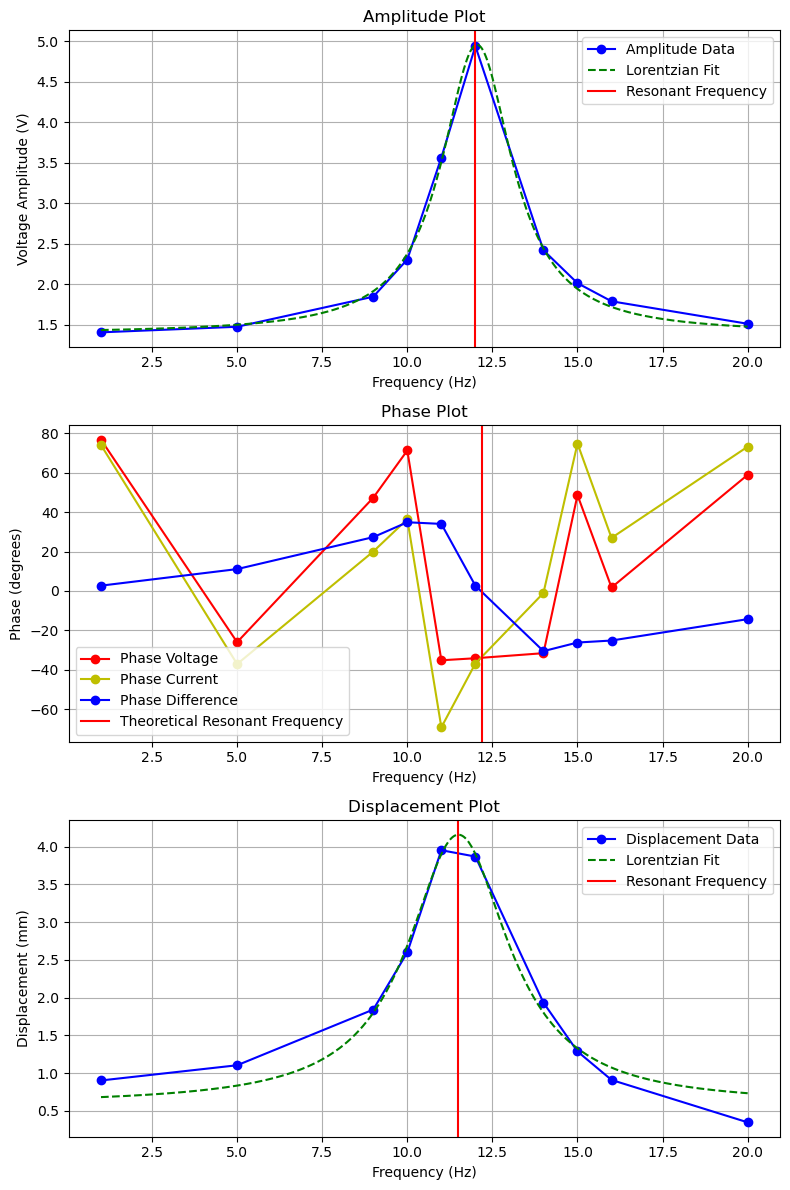

In [810]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Lorentzian function
def lorentzian(f, Z0, A, f0, gamma):
    return Z0 + (A / ((f - f0)**2 + (gamma / 2)**2))

# Fit Lorentzian to the first dataset (Amplitude vs. Frequency)
popt_amplitude, _ = curve_fit(lorentzian, frequency_array, amplitude_array, p0=[min(amplitude_array), max(amplitude_array), 12.2, 1.0])
Z01, A1, f01, gamma1 = popt_amplitude
print(popt_amplitude)

# Fit Lorentzian to the third dataset (Displacement vs. Frequency)
popt_displacement, _ = curve_fit(lorentzian, frequency_array, amplitudedisplacement_array, p0=[min(amplitudedisplacement_array), max(amplitudedisplacement_array), 12.2, 1.0])
Z03, A3, f03, gamma3 = popt_displacement
print(popt_displacement)

# Generate fitted curve data
f_fit = np.linspace(min(frequency_array), max(frequency_array), 500)

# Plot the results
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# First dataset (Amplitude Plot with Lorentzian Fit)
axs[0].plot(frequency_array, amplitude_array, color='b', marker='o', label='Amplitude Data')
axs[0].plot(f_fit, lorentzian(f_fit, *popt_amplitude), 'g--', label='Lorentzian Fit')
axs[0].axvline(x=12.0, color='r', label='Resonant Frequency')
axs[0].set_title("Amplitude Plot")
axs[0].set_xlabel("Frequency (Hz)")
axs[0].set_ylabel("Voltage Amplitude (V)")
axs[0].grid(True)
axs[0].legend()

# Second dataset (Phase Plot)
axs[1].plot(frequency_array, phasevoltage_array, 'o', linestyle='-', label='Phase Voltage', color='r')
axs[1].plot(frequency_array, phasecurrent_array, 'o', linestyle='-', label='Phase Current', color='y')
axs[1].plot(frequency_array, netphasearray, 'o', linestyle='-', label='Phase Difference', color='b')
axs[1].axvline(x=12.2, color='r', label='Theoretical Resonant Frequency')
axs[1].set_title("Phase Plot")
axs[1].set_xlabel("Frequency (Hz)")
axs[1].set_ylabel("Phase (degrees)")
axs[1].grid(True)
axs[1].legend()

# Third dataset (Displacement Plot with Lorentzian Fit)
axs[2].plot(frequency_array, amplitudedisplacement_array, marker='o', color='b', label='Displacement Data')
axs[2].plot(f_fit, lorentzian(f_fit, *popt_displacement), 'g--', label='Lorentzian Fit')
axs[2].axvline(x=11.5, color='r', label='Resonant Frequency')
axs[2].set_title("Displacement Plot")
axs[2].set_xlabel("Frequency (Hz)")
axs[2].set_ylabel("Displacement (mm)")
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()


question 2

[ 7.14387218  7.48872135  9.35729867 11.6309265  17.89129139 25.03953276
 12.39764751 10.30569542  9.15062444  7.71695935]


c:\Users\kylea\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


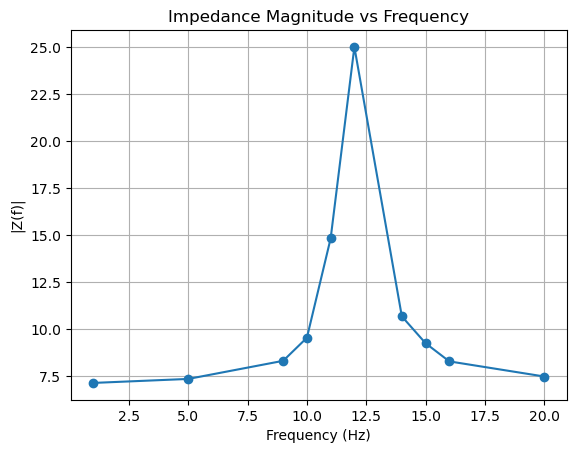

In [811]:
voltage_magnitude = np.array(amplitude_array)  
voltage_phase = np.array(phasevoltage_array)  
current_magnitude = np.array(amplitudecurrent_array)  
current_phase = np.array(phasecurrent_array)  

# Convert phase angles from degrees to radians
voltage_phase_rad = np.deg2rad(voltage_phase)
current_phase_rad = np.deg2rad(current_phase)

# Calculate complex voltage and current
voltage_complex = voltage_magnitude * (np.cos(voltage_phase_rad) + 1j * np.sin(voltage_phase_rad))
current_complex = current_magnitude * (np.cos(current_phase_rad) + 1j * np.sin(current_phase_rad))

# Calculate complex impedance Z(f)
impedance_array = voltage_complex / current_complex

# Get the magnitude of impedance for plotting
impedance_magnitude = np.abs(impedance_array)

print(impedance_magnitude)

plt.plot(frequency_array, impedance_array, marker = 'o')
plt.xlabel("Frequency (Hz)")
plt.ylabel("|Z(f)|")
plt.title("Impedance Magnitude vs Frequency")
plt.grid(True)
plt.show()

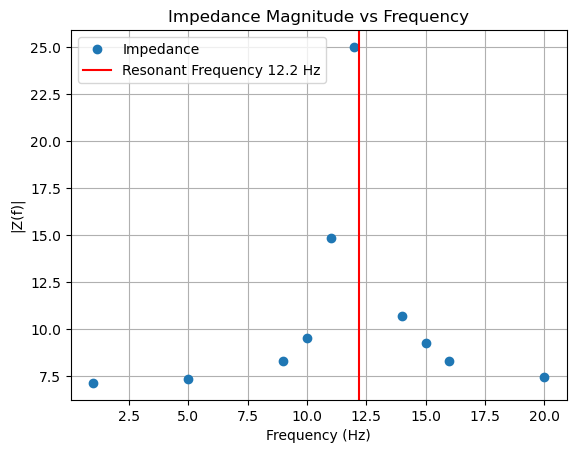

In [812]:
plt.plot(frequency_array, impedance_array, marker = 'o', label = 'Impedance', linestyle = 'None')
plt.axvline(x=12.2, color = 'r', label = 'Resonant Frequency 12.2 Hz')
plt.xlabel("Frequency (Hz)")
plt.ylabel("|Z(f)|")
plt.title("Impedance Magnitude vs Frequency")
plt.grid(True)
plt.legend()
plt.show()

Fitted parameters: Z0=7.066654082225007, A=29.155980225866447, f0=12.07346028378893, gamma=2.538936443301333


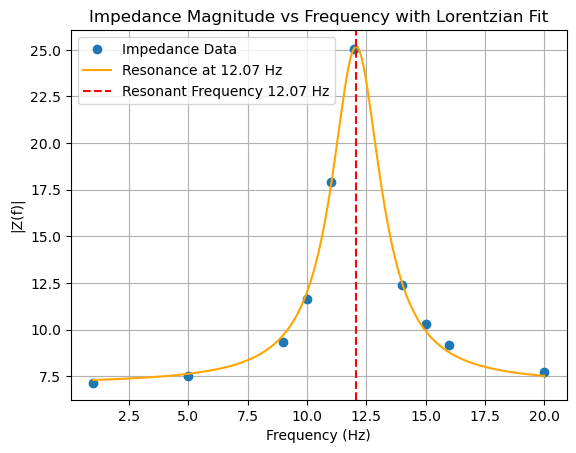

In [813]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Sample frequency and impedance arrays (replace with your actual data)
frequency_array = np.array([1,5,9,10,11,12,14,15,16,20])  # Replace with your frequency data
impedance_array = np.array([7.14387218, 7.48872135, 9.35729867, 11.6309265, 17.89129139, 25.03953276, 12.39764751, 10.30569542, 9.15062444, 7.71695935])  # Replace with your impedance data

# Define the Lorentzian function
def lorentzian(f, Z0, A, f0, gamma):
    return Z0 + (A / ((f - f0)**2 + (gamma / 2)**2))

# Fit the Lorentzian model to your data
initial_guess = [min(impedance_array), max(impedance_array), 12.2, 1.0]
params, _ = curve_fit(lorentzian, frequency_array, impedance_array, p0=initial_guess)

# Extract fitted parameters
Z0, A, f0, gamma = params
print(f"Fitted parameters: Z0={Z0}, A={A}, f0={f0}, gamma={gamma}")

# Generate fitted curve data
f_fit = np.linspace(min(frequency_array), max(frequency_array), 500)
Z_fit = lorentzian(f_fit, *params)

# Plot the original data and the fitted curve
plt.plot(frequency_array, impedance_array, 'o', label='Impedance Data', linestyle='None')
plt.plot(f_fit, Z_fit, '-', color='orange', label=f'Resonance at {f0:.2f} Hz')
plt.axvline(x=f0, color='r', linestyle='--', label=f'Resonant Frequency {f0:.2f} Hz')
plt.xlabel("Frequency (Hz)")
plt.ylabel("|Z(f)|")
plt.title("Impedance Magnitude vs Frequency with Lorentzian Fit")
plt.grid(True)
plt.legend(loc = 'upper left')
plt.show()


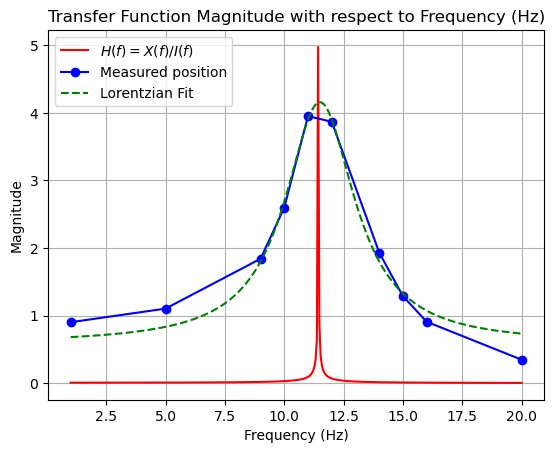

In [814]:
# Transfer function
m = 0.285
k = 1.471/(10**(-3))
R = 7.5
L = 3.3*(10**(-3))
B_l = 10.2

# Calculate the frequency range
f = np.linspace(1, 20, 360)  # Frequency range from 1 Hz to 1000 Hz
omega = 2 * np.pi * f        # Angular frequency

# Calculate the impedance magnitude
H = abs(B_l/(k-(omega**2)*m))
impedance_magnitude_db = 20 * np.log10(np.abs(H))

# Calculate the impedance magnitude
Z_total = np.sqrt((R**2) + ((omega*(L + (B_l**2)/(k - (omega**2)*m))))**2)

# Plot the impedance magnitude in dB
plt.plot(f, H, label = r'$ H(f) = X(f)/I(f) $', color = 'r')
plt.plot(frequency_array, amplitudedisplacement_array, marker = 'o', color = 'b', label = 'Measured position')
plt.plot(f_fit, lorentzian(f_fit, *popt_displacement), 'g--', label='Lorentzian Fit')
# plt.axvline(x=11.4, linestyle = '-', color = 'y')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Transfer Function Magnitude with respect to Frequency (Hz)')
plt.legend(loc='upper left')
plt.grid()
plt.show()


# Part C

In [815]:
square2_5hz = pd.read_excel('Lab4_2.5Hz_square.xlsx', skiprows = 1)
square3hz = pd.read_excel('Lab4_3hz_square.xlsx', skiprows = 1)
square3hz = square3hz[200:]

In [816]:
square2_5hz.head()

,Time (s),Load Cell (kg),Accelerometer (V),LED (V),Coil Voltage (V),Coil Current (A)
0,0.005,0.661268,2.546694,2.719822,4.147791,0.805413
1,0.010,0.617188,2.401788,2.859959,4.169502,0.806729
2,0.015,0.581002,2.265105,3.059639,4.251413,0.805742
3,0.020,0.556659,2.164937,3.282674,4.369839,0.807716
4,0.025,0.543994,2.115264,3.498472,4.502081,0.806071


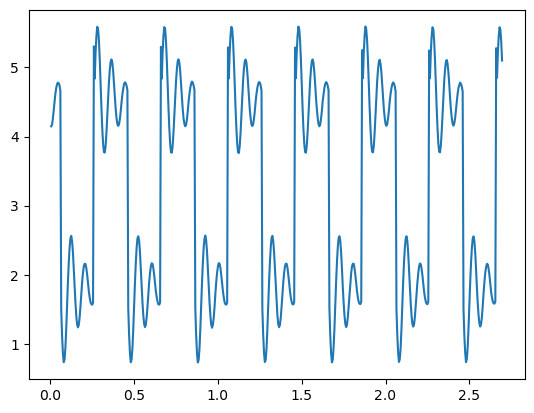

In [857]:
plt.plot(square2_5hz['Time (s)'], square2_5hz['Coil Voltage (V)'])

In [818]:
def analyze_current_transitions(time, current, threshold_percentage=0.1):
    """
    Analyze current transitions in a square wave to find di/dt
    
    Parameters:
    time: array-like, time values
    current: array-like, current values
    threshold_percentage: float, percentage of total swing to use for detecting transitions
    
    Returns:
    dict containing transition statistics
    """
    # Calculate the range of current values
    current_min = np.min(current)
    current_max = np.max(current)
    current_range = current_max - current_min
    
    # Define thresholds for detecting transitions
    lower_threshold = current_min + current_range * threshold_percentage
    upper_threshold = current_max - current_range * threshold_percentage
    
    rising_transitions = []
    falling_transitions = []
    
    # Find transitions
    for i in range(1, len(time)):
        if current[i-1] < lower_threshold and current[i] > upper_threshold:
            rising_transitions.append({
                'start_time': time[i-1],
                'end_time': time[i],
                'start_current': current[i-1],
                'end_current': current[i],
                'di_dt': (current[i] - current[i-1]) / (time[i] - time[i-1])
            })
        elif current[i-1] > upper_threshold and current[i] < lower_threshold:
            falling_transitions.append({
                'start_time': time[i-1],
                'end_time': time[i],
                'start_current': current[i-1],
                'end_current': current[i],
                'di_dt': (current[i] - current[i-1]) / (time[i] - time[i-1])
            })
    
    # Calculate statistics
    rising_di_dt = [t['di_dt'] for t in rising_transitions]
    falling_di_dt = [t['di_dt'] for t in falling_transitions]
    
    stats = {
        'num_rising_transitions': len(rising_transitions),
        'num_falling_transitions': len(falling_transitions),
        'avg_rising_di_dt': np.mean(rising_di_dt) if rising_di_dt else 0,
        'avg_falling_di_dt': np.mean(falling_di_dt) if falling_di_dt else 0,
        'min_rising_di_dt': np.min(rising_di_dt) if rising_di_dt else 0,
        'max_rising_di_dt': np.max(rising_di_dt) if rising_di_dt else 0,
        'min_falling_di_dt': np.min(falling_di_dt) if falling_di_dt else 0,
        'max_falling_di_dt': np.max(falling_di_dt) if falling_di_dt else 0,
        'avg_transition_time': np.mean([t['end_time'] - t['start_time'] 
                                      for t in rising_transitions + falling_transitions])
    }
    
    return stats, rising_transitions, falling_transitions

# Example usage with your data:
# Assuming square2_5hz is your DataFrame
stats, rising, falling = analyze_current_transitions(
    square2_5hz['Time (s)'].values,
    square2_5hz['Coil Current (A)'].values
)

# Print the results
print("Square Wave Analysis Results:")
print(f"Number of rising transitions: {stats['num_rising_transitions']}")
print(f"Number of falling transitions: {stats['num_falling_transitions']}")
print(f"Average rising di/dt: {stats['avg_rising_di_dt']:.2f} A/s")
print(f"Average falling di/dt: {stats['avg_falling_di_dt']:.2f} A/s")
print(f"Average transition time: {stats['avg_transition_time']*1e6:.2f} microseconds")

Square Wave Analysis Results:
Number of rising transitions: 6
Number of falling transitions: 7
Average rising di/dt: 71.97 A/s
Average falling di/dt: -78.99 A/s
Average transition time: 5000.00 microseconds


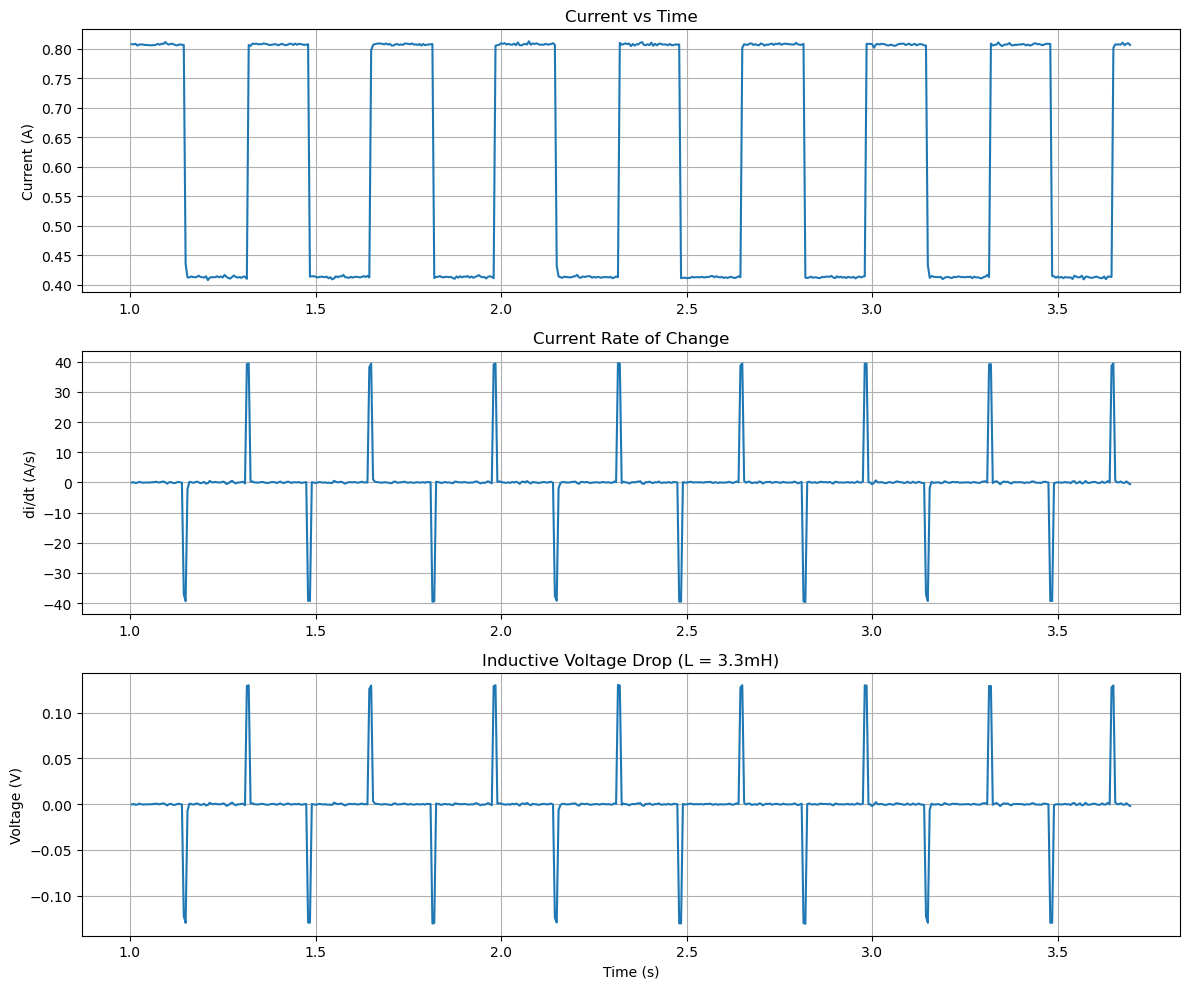


Analysis Results:
Maximum di/dt: 39.64 A/s
Maximum inductive voltage drop: 0.13 V
Average significant voltage drop: 0.13 V


In [819]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_voltage_drop(time, current, L, sample_rate):
    """
    Calculate voltage drop across inductance using L*di/dt
    
    Parameters:
    time: array-like, time values
    current: array-like, current values
    L: float, inductance value in Henries
    sample_rate: float, sampling rate in Hz
    
    Returns:
    tuple: voltage drop across inductance, di/dt values
    """
    # Calculate di/dt using numpy gradient
    dt = 1/sample_rate
    di_dt = np.gradient(current, dt)
    
    # Calculate voltage drop (V = L * di/dt)
    v_L = L * di_dt
    
    return v_L, di_dt

# Parameters
L = 0.0033  # 5mH
SAMPLE_RATE = 200  # 200 Hz

# Calculate voltage drop
v_L, di_dt = analyze_voltage_drop(
    square3hz['Time (s)'].values,
    square3hz['Coil Current (A)'].values,
    L,
    SAMPLE_RATE
)

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Plot current
ax1.plot(square3hz['Time (s)'], square3hz['Coil Current (A)'])
ax1.set_ylabel('Current (A)')
ax1.set_title('Current vs Time')
ax1.grid(True)

# Plot di/dt
ax2.plot(square3hz['Time (s)'], di_dt)
ax2.set_ylabel('di/dt (A/s)')
ax2.set_title('Current Rate of Change')
ax2.grid(True)

# Plot voltage drop
ax3.plot(square3hz['Time (s)'], v_L)
ax3.set_ylabel('Voltage (V)')
ax3.set_xlabel('Time (s)')
ax3.set_title('Inductive Voltage Drop (L = 3.3mH)')
ax3.grid(True)

plt.tight_layout()
plt.show()

# Calculate and print statistics
max_di_dt = np.max(np.abs(di_dt))
max_v_L = np.max(np.abs(v_L))
avg_v_L = np.mean(np.abs(v_L[np.abs(v_L) > max_v_L*0.1]))  # Average of significant voltage drops

print("\nAnalysis Results:")
print(f"Maximum di/dt: {max_di_dt:.2f} A/s")
print(f"Maximum inductive voltage drop: {max_v_L:.2f} V")
print(f"Average significant voltage drop: {avg_v_L:.2f} V")

# Add the voltage drop to the dataframe
square3hz['Inductive Voltage (V)'] = v_L

In [820]:
import numpy as np

def calculate_rms_current(current_data):
    """
    Calculate RMS current from time series data
    """
    # Using numpy's built-in RMS calculation
    i_rms = np.sqrt(np.mean(np.square(current_data)))
    return i_rms

# Calculate RMS current from the data
i_rms = calculate_rms_current(square3hz['Coil Current (A)'])

# Calculate theoretical RMS for square wave
i_high = 0.8  # A
i_low = 0.4   # A
i_rms_theoretical = np.sqrt((i_high**2 + i_low**2)/2)

print(f"RMS Current (from data): {i_rms:.3f} A")
print(f"RMS Current (theoretical): {i_rms_theoretical:.3f} A")
print(f"Average Current: {np.mean(square3hz['Coil Current (A)']):.3f} A")
print(f"Peak-to-Peak Current: {i_high - i_low:.3f} A")

RMS Current (from data): 0.643 A
RMS Current (theoretical): 0.632 A
Average Current: 0.612 A
Peak-to-Peak Current: 0.400 A


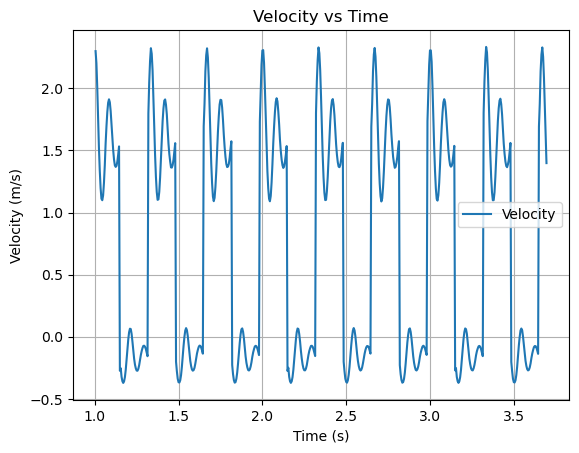

In [821]:
u_t = (square3hz['Coil Voltage (V)']**2-(L*di_dt)**2-R*i_rms)/B_l

plt.plot(square3hz['Time (s)'], u_t, label ='Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')
plt.grid(True)
plt.legend()
plt.show()

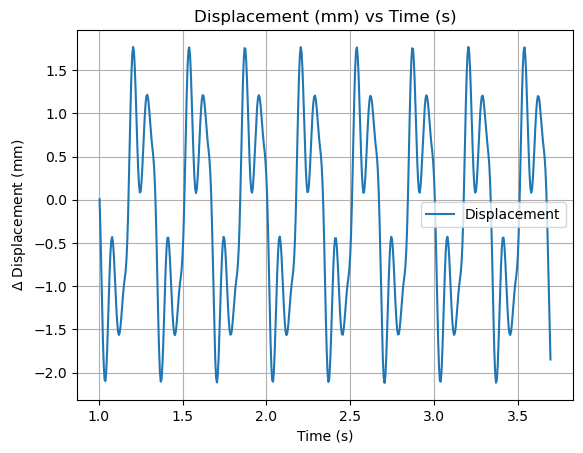

In [827]:
# displacement vs time
plt.plot(square3hz['Time (s)'], square3hz['LED (V)']-4.5, label ='Displacement')
plt.xlabel('Time (s)')
plt.ylabel(r'$\Delta$ Displacement (mm)')
plt.title('Displacement (mm) vs Time (s)')
plt.grid(True)
plt.legend()
plt.show()

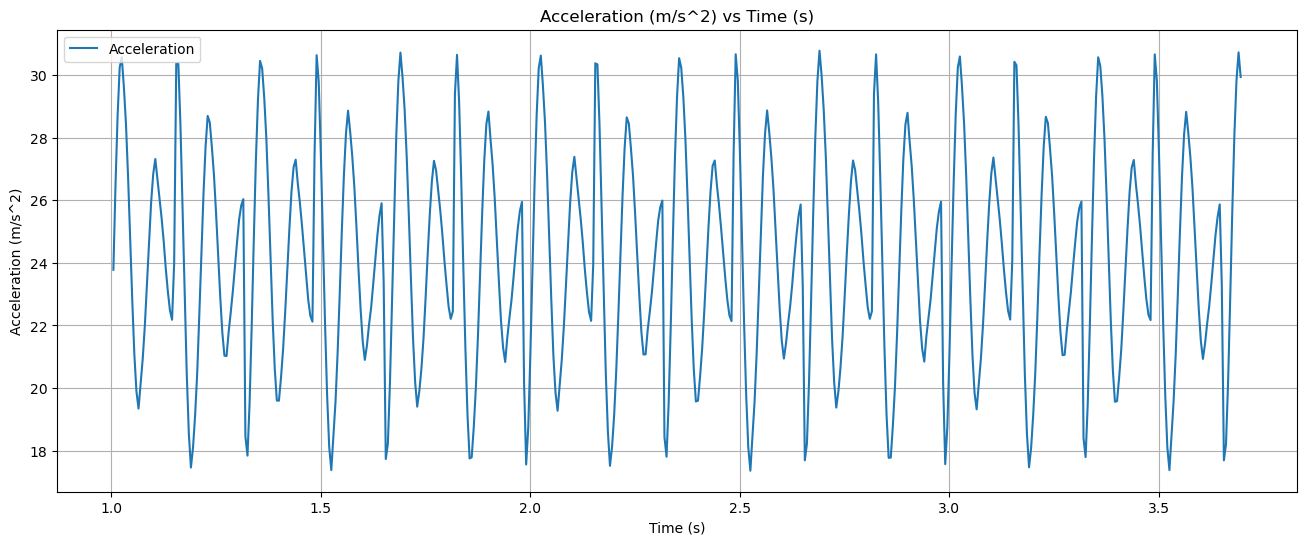

In [858]:
# Adjust figure size to make the x-axis longer
plt.figure(figsize=(16, 6))  # Increase the width of the figure
plt.plot(square3hz['Time (s)'], square3hz['Accelerometer (V)'] * 9.81, label='Acceleration')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration (m/s^2) vs Time (s)')
plt.grid(True)
plt.legend()
plt.show()


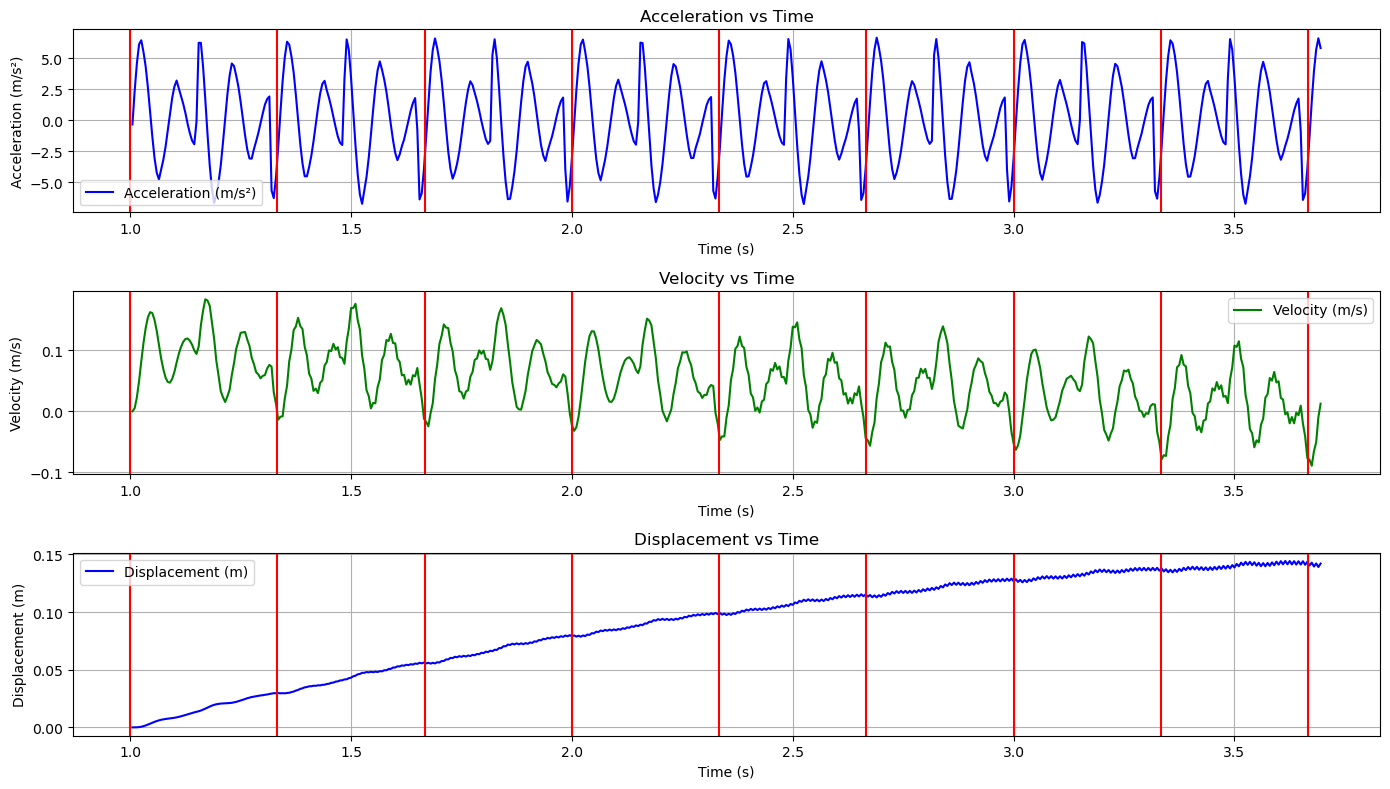

In [880]:
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt
from scipy.integrate import simps
import numpy as np

acceleration = square3hz['Accelerometer (V)']*9.81 - 24.12
time = square3hz['Time (s)']

# # Integrate acceleration to obtain velocity
# velocity = cumtrapz(acceleration, time, initial=0)
# # Integrate velocity to obtain displacement
# displacement = cumtrapz(velocity, time, initial=0)

# # Assuming uniform time steps
# dt = 0.005
# # Integrate acceleration for velocity
# velocity = np.cumsum(acceleration) * dt
# # Integrate velocity for displacement
# displacement = np.cumsum(velocity) * dt

# Calculate cumulative integral using Simpson's rule
velocity = np.array([simps(acceleration[:i+1], time[:i+1]) for i in range(len(time))])
displacement = np.array([simps(velocity[:i+1], time[:i+1]) for i in range(len(time))])

# Plotting results
plt.figure(figsize=(14, 8))

# Plot acceleration
plt.subplot(3, 1, 1)
plt.plot(time, acceleration, label="Acceleration (m/s²)", color="blue")
plt.axvline(x=(1+0*(1/3)), color = 'r')
plt.axvline(x=(1+1*(1/3)), color = 'r')
plt.axvline(x=(1+2*(1/3)), color = 'r')
plt.axvline(x=(1+3*(1/3)), color = 'r')
plt.axvline(x=(1+4*(1/3)), color = 'r')
plt.axvline(x=(1+5*(1/3)), color = 'r')
plt.axvline(x=(1+6*(1/3)), color = 'r')
plt.axvline(x=(1+7*(1/3)), color = 'r')
plt.axvline(x=(1+8*(1/3)), color = 'r')
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s²)")
plt.title("Acceleration vs Time")
plt.grid(True)
plt.legend()

# Plot velocity
plt.subplot(3, 1, 2)
plt.plot(time, velocity, label="Velocity (m/s)", color="green")
plt.axvline(x=(1+0*(1/3)), color = 'r')
plt.axvline(x=(1+1*(1/3)), color = 'r')
plt.axvline(x=(1+2*(1/3)), color = 'r')
plt.axvline(x=(1+3*(1/3)), color = 'r')
plt.axvline(x=(1+4*(1/3)), color = 'r')
plt.axvline(x=(1+5*(1/3)), color = 'r')
plt.axvline(x=(1+6*(1/3)), color = 'r')
plt.axvline(x=(1+7*(1/3)), color = 'r')
plt.axvline(x=(1+8*(1/3)), color = 'r')
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.title("Velocity vs Time")
plt.grid(True)
plt.legend()

# Plot displacement
plt.subplot(3, 1, 3)
plt.plot(time, displacement, label="Displacement (m)", color="blue")
plt.axvline(x=(1+0*(1/3)), color = 'r')
plt.axvline(x=(1+1*(1/3)), color = 'r')
plt.axvline(x=(1+2*(1/3)), color = 'r')
plt.axvline(x=(1+3*(1/3)), color = 'r')
plt.axvline(x=(1+4*(1/3)), color = 'r')
plt.axvline(x=(1+5*(1/3)), color = 'r')
plt.axvline(x=(1+6*(1/3)), color = 'r')
plt.axvline(x=(1+7*(1/3)), color = 'r')
plt.axvline(x=(1+8*(1/3)), color = 'r')
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.title("Displacement vs Time")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
